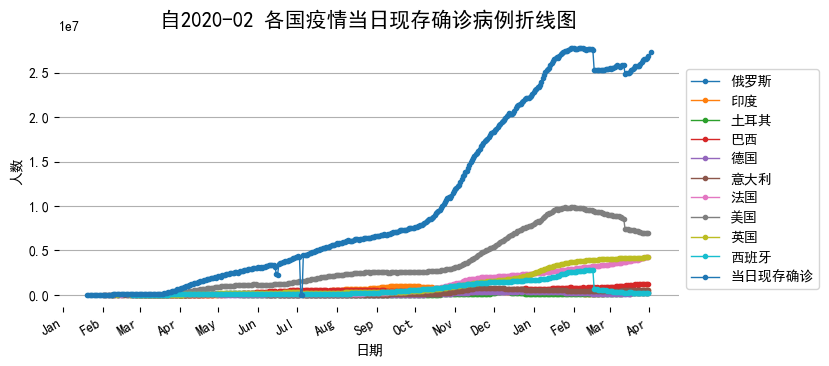

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import pandas as pd
import pyecharts
import pyecharts.options as opts
from pyecharts.charts import Map
import datetime
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.dpi'] = 100
alltime_world = pd.read_csv("./DataSet/historytime_world_2021_04_02.csv")
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'全球当日现存'}
alltime_world.rename(columns=name_dict,inplace=True)
alltime_world['日期'] = pd.to_datetime(alltime_world['日期'])
# 计算当日现存确诊
alltime_world['当日现存确诊'] = alltime_world['累计确诊']-alltime_world['累计治愈']-alltime_world['累计死亡']

#全球当日确诊数=各国国家当日现存确诊相加  解除注释，获得全球数据
#alltime_world.groupby(['日期','名称'])['当日现存确诊'].sum()

alltime_world.set_index('日期',inplace=True)
data = alltime_world.groupby(['日期','名称']).mean()
data_part = data.loc(axis=0)[:,['美国', '巴西', '印度', '法国', '俄罗斯', '英国', '意大利', '土耳其', '西班牙','德国']]
#取消二级索引 并对源文件生效
data_part.reset_index('名称',inplace=True)
fig, ax = plt.subplots(figsize=(8,4))
#前十绘图
data_part['2020-02':'2021-03-31'].groupby('名称')['当日现存确诊'].plot(legend=True,marker='o',ms=3,lw=1)
#全球绘图 看需求 注释掉
alltime_world.groupby('日期')['当日现存确诊'].sum().plot(legend=True,marker='o',ms=3,lw=1)
ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))   
fig.autofmt_xdate()    
plt.title('自2020-02 各国疫情当日现存确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
#添加图例
plt.legend(bbox_to_anchor = [1,0.9])
plt.show()